In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, uuid

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [22]:
dataset = pd.read_parquet("../data/processed/dataset.parquet")

In [23]:
# on remplace les identifiants nuls par un identifiant aléatoire
dataset["identifiant_usager"] = dataset["identifiant_usager"].apply(lambda row: row if row is not None else int(str(hash(uuid.uuid4()))[:9]))

In [24]:
# on enlève les doublons (environ 39k)
dataset = dataset.drop_duplicates(subset=["identifiant_usager"])

In [25]:
dataset.describe()

,jour_accident,mois_accident,annee_accident,conditions_lumieres,localisation,type_intersection,conditions_atmospheriques,type_collision,categorie_route,indice_route,regime_circulation,presence_voie_reservee,profil_route,tracage_route,etat_surface,infrastructure,situation_accident,vitesse_max_autorisee,sens_circulation,categorie_vehicule,obstacle_fixe_heurte,obstacle_mobile_heurte,point_choc_initial,manoeuvre_avant_accident,type_motorisation,nombre_occupants_tc,place_occupant,categorie_usager,gravite_blessure,sexe_usager,annee_naissance,motif_deplacement,equipement_securite_1,equipement_securite_2,equipement_securite_3,localisation_pieton,etat_pieton
count,488926.000000,488926.000000,488926.000000,488926.000000,488926.000000,488926.000000,488926.000000,488926.000000,488926.000000,488926.000000,488926.000000,488926.000000,488926.000000,488926.000000,488926.000000,488926.000000,488926.000000,488926.000000,488926.000000,488926.000000,488926.000000,488926.000000,488926.000000,488926.000000,488926.000000,6318.000000,486971.000000,486971.000000,486971.000000,486971.000000,478432.000000,486971.000000,486971.000000,486971.000000,486971.000000,486971.000000,486971.000000
mean,15.599774,6.745370,2021.554628,1.906421,1.617286,2.068190,1.609798,3.718990,3.287743,-0.179291,1.814195,0.203548,1.229303,1.287166,1.254900,0.782752,1.519040,60.114676,1.565059,12.744536,1.128698,1.581945,2.860106,6.980187,1.235232,6.953625,2.078113,1.329593,2.524202,1.276764,1983.152346,3.185338,1.878239,0.973243,-0.908598,-0.223707,-0.826811
std,8.749016,3.355763,1.095522,1.476379,0.486050,1.999118,1.676809,1.900634,1.273047,0.400606,0.917965,0.671784,0.542388,0.666682,0.788341,2.141806,1.484824,25.932569,0.824181,13.600654,3.260144,1.227323,2.395551,7.996643,1.032913,11.605975,2.572809,0.610148,1.378153,0.549231,18.915575,2.771263,2.291526,3.038332,0.917096,1.226304,0.621644
min,1.000000,1.000000,2020.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,-1.000000,-1.000000,1900.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,8.000000,4.000000,2021.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,0.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,50.000000,1.000000,7.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1970.000000,0.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,16.000000,7.000000,2022.000000,1.000000,2.000000,1.000000,1.000000,3.000000,3.000000,0.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,50.000000,1.000000,7.000000,0.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,3.000000,1.000000,1987.000000,4.000000,1.000000,0.000000,-1.000000,0.000000,-1.000000
75%,23.000000,10.000000,2023.000000,3.000000,2.000000,2.000000,1.000000,6.000000,4.000000,0.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,80.000000,2.000000,10.000000,0.000000,2.000000,4.000000,15.000000,1.000000,6.000000,2.000000,2.000000,4.000000,2.000000,1998.000000,5.000000,2.000000,0.000000,-1.000000,0.000000,-1.000000
max,31.000000,12.000000,2023.000000,5.000000,2.000000,9.000000,9.000000,7.000000,9.000000,3.000000,4.000000,3.000000,4.000000,4.000000,9.000000,9.000000,8.000000,901.000000,3.000000,99.000000,17.000000,9.000000,9.000000,26.000000,6.000000,65.000000,10.000000,3.000000,4.000000,2.000000,2023.000000,9.000000,9.000000,9.000000,9.000000,9.000000,3.000000


In [26]:
# valeurs manquantes
dataset.isna().mean()*100

numero_accident               0.000000
jour_accident                 0.000000
mois_accident                 0.000000
annee_accident                0.000000
heure_accident                0.000000
conditions_lumieres           0.000000
departement                   0.000000
commune                       0.000000
localisation                  0.000000
type_intersection             0.000000
conditions_atmospheriques     0.000000
type_collision                0.000000
adresse                       1.710688
latitude                      0.000000
longitude                     0.000000
categorie_route               0.000000
numero_route                 11.669046
indice_route                  0.000000
lettre_route                 91.274549
regime_circulation            0.000000
nombre_voies                  0.000000
presence_voie_reservee        0.000000
profil_route                  0.000000
numero_pr                     0.000000
distance_pr                   0.000000
tracage_route            

In [27]:
#on supprime les colonnes qui ne nous apportent pas d'information
cols_to_drop = ['lettre_route', 'adresse', 'latitude', 'longitude', 'numero_route', 'indice_route', 'lettre_route', 'lartpc','nombre_occupants_tc','numero_vehicule' ]
dataset = dataset.drop(cols_to_drop, axis=1)

In [28]:
#on supprime les lignes qui ont 'place_occupant' manquant car 6 autres variables sont aussi manquantes dans ces cas et on a que 2k valeurs donc on les oublie
dataset = dataset.dropna(subset=["place_occupant"])

In [29]:
#on remplace les valeurs nulles par -1 car la valeur manquante represente une information 
# (ex: delit de fuite) on choisit -1 pour etre dans les codes du dataset
dataset['annee_naissance'] = dataset['annee_naissance'].fillna(-1)

In [30]:
#les transports en commun ne seont present que dans 1% des accidents, mais ils donnent potentiellement un info sur la gravité de l'accident
#on décide de drop cette variable plutot que de la completer de 0 (pas de victime de transport en commun)
#dataset[dataset['nombre_occupants_tc'].notnull()]['nombre_occupants_tc'].value_counts()

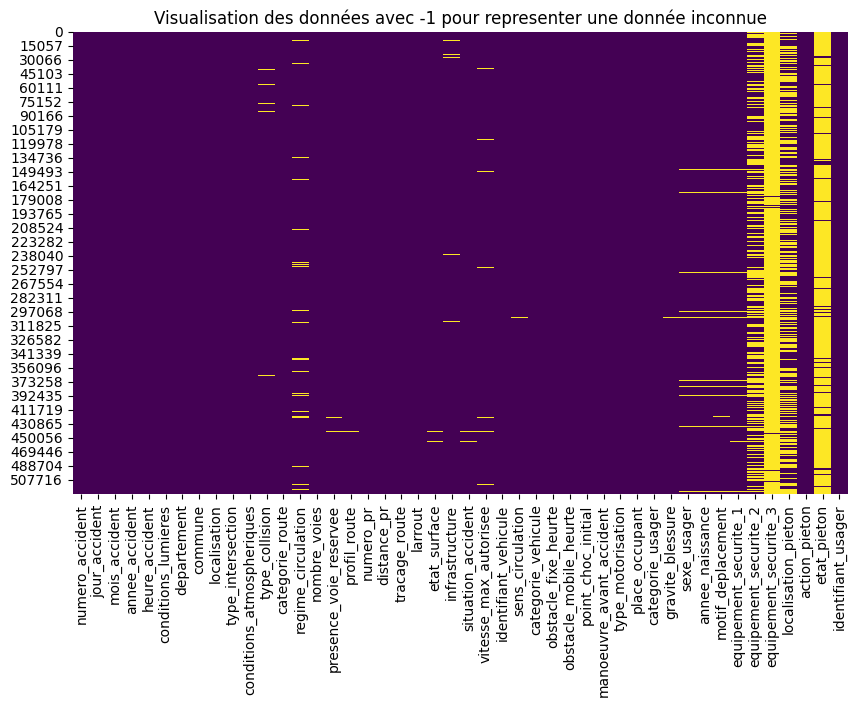

In [31]:
plt.figure(figsize=(10, 6))
sns.heatmap(dataset == -1, cbar=False, cmap="viridis")
plt.title("Visualisation des données avec -1 pour representer une donnée inconnue")
plt.show()

In [32]:
dataset.isna().mean()*100

numero_accident              0.0
jour_accident                0.0
mois_accident                0.0
annee_accident               0.0
heure_accident               0.0
conditions_lumieres          0.0
departement                  0.0
commune                      0.0
localisation                 0.0
type_intersection            0.0
conditions_atmospheriques    0.0
type_collision               0.0
categorie_route              0.0
regime_circulation           0.0
nombre_voies                 0.0
presence_voie_reservee       0.0
profil_route                 0.0
numero_pr                    0.0
distance_pr                  0.0
tracage_route                0.0
larrout                      0.0
etat_surface                 0.0
infrastructure               0.0
situation_accident           0.0
vitesse_max_autorisee        0.0
identifiant_vehicule         0.0
sens_circulation             0.0
categorie_vehicule           0.0
obstacle_fixe_heurte         0.0
obstacle_mobile_heurte       0.0
point_choc

37 908 doublons sur 526 844 lignes
tous concentrés sur l'année 2023

potentielles features par rapport a un accident (groupby id accident) => nb des gens dans l'accident et nb de victimes

In [33]:
#incoherences
display(dataset.describe())

,jour_accident,mois_accident,annee_accident,conditions_lumieres,localisation,type_intersection,conditions_atmospheriques,type_collision,categorie_route,regime_circulation,presence_voie_reservee,profil_route,tracage_route,etat_surface,infrastructure,situation_accident,vitesse_max_autorisee,sens_circulation,categorie_vehicule,obstacle_fixe_heurte,obstacle_mobile_heurte,point_choc_initial,manoeuvre_avant_accident,type_motorisation,place_occupant,categorie_usager,gravite_blessure,sexe_usager,annee_naissance,motif_deplacement,equipement_securite_1,equipement_securite_2,equipement_securite_3,localisation_pieton,etat_pieton
count,486971.000000,486971.000000,486971.000000,486971.000000,486971.000000,486971.000000,486971.000000,486971.000000,486971.000000,486971.000000,486971.000000,486971.000000,486971.000000,486971.000000,486971.000000,486971.000000,486971.000000,486971.000000,486971.000000,486971.000000,486971.000000,486971.000000,486971.000000,486971.000000,486971.000000,486971.000000,486971.000000,486971.000000,486971.000000,486971.000000,486971.000000,486971.000000,486971.000000,486971.000000,486971.000000
mean,15.600126,6.744866,2021.560543,1.904294,1.616601,2.067326,1.610394,3.724589,3.287128,1.814554,0.203394,1.229387,1.287500,1.255085,0.783127,1.519398,60.131768,1.565775,12.756353,1.132189,1.580347,2.863499,6.977163,1.237846,2.078113,1.329593,2.524202,1.276764,1948.360383,3.185338,1.878239,0.973243,-0.908598,-0.223707,-0.826811
std,8.748938,3.355335,1.093302,1.474672,0.486215,1.998427,1.677645,1.899637,1.273528,0.917725,0.671730,0.542468,0.667017,0.789005,2.142070,1.485316,25.946355,0.823732,13.599406,3.264737,1.225769,2.395088,7.994888,1.032162,2.572809,0.610148,1.378153,0.549231,261.101011,2.771263,2.291526,3.038332,0.917096,1.226304,0.621644
min,1.000000,1.000000,2020.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,8.000000,4.000000,2021.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,50.000000,1.000000,7.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1969.000000,0.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,16.000000,7.000000,2022.000000,1.000000,2.000000,1.000000,1.000000,3.000000,3.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,50.000000,1.000000,7.000000,0.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1986.000000,4.000000,1.000000,0.000000,-1.000000,0.000000,-1.000000
75%,23.000000,10.000000,2023.000000,3.000000,2.000000,2.000000,1.000000,6.000000,4.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,80.000000,2.000000,10.000000,0.000000,2.000000,4.000000,15.000000,1.000000,2.000000,2.000000,4.000000,2.000000,1998.000000,5.000000,2.000000,0.000000,-1.000000,0.000000,-1.000000
max,31.000000,12.000000,2023.000000,5.000000,2.000000,9.000000,9.000000,7.000000,9.000000,4.000000,3.000000,4.000000,4.000000,9.000000,9.000000,8.000000,901.000000,3.000000,99.000000,17.000000,9.000000,9.000000,26.000000,6.000000,10.000000,3.000000,4.000000,2.000000,2023.000000,9.000000,9.000000,9.000000,9.000000,9.000000,3.000000


In [34]:
#drop the rows that have #VALEURMULTI or #ERREUR in nombre_voies
dataset['nombre_voies'] = dataset['nombre_voies'].str.replace(' ', '')
dataset = dataset[dataset['nombre_voies'] != '#ERREUR']
dataset = dataset[dataset['nombre_voies'] != '#VALEURMULTI']
dataset['nombre_voies'] = dataset['nombre_voies'].astype(int)

In [35]:
#on ne garde que les valeurs de vitesse max autorisée qui sont des multiples de 5 et inférieures à 130 
# (il y avait des valeurs trop petites et trop grandes)
dataset = dataset[(dataset['vitesse_max_autorisee'] % 5 == 0) & (dataset['vitesse_max_autorisee'] <= 130)]

(array([1.5000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 4.0000e+00,
        5.0000e+00, 1.0000e+00, 2.0000e+00, 2.0000e+01, 4.8000e+01,
        2.7400e+02, 4.0900e+02, 8.4200e+02, 2.0580e+03, 1.9240e+03,
        3.6090e+03, 2.5680e+03, 4.8710e+03, 4.0470e+03, 7.5170e+03,
        5.3000e+03, 8.3670e+03, 6.1620e+03, 1.0959e+04, 9.0300e+03,
        1.0143e+04, 1.7083e+04, 1.1852e+04, 1.9228e+04, 1.3545e+04,
        1.9267e+04, 1.3125e+04, 2.1613e+04, 1.4948e+04, 2.4231e+04,
        1.7443e+04, 2.7987e+04, 1.9504e+04, 2.0916e+04, 3.4667e+04,
        2.7613e+04, 3.8058e+04, 1.5884e+04, 1.2309e+04, 4.5350e+03,
        5.2360e+03, 3.0770e+03, 4.3290e+03, 2.3810e+03, 1.4670e+03]),
 array([1900.  , 1902.46, 1904.92, 1907.38, 1909.84, 1912.3 , 1914.76,
        1917.22, 1919.68, 1922.14, 1924.6 , 1927.06, 1929.52, 1931.98,
        1934.44, 1936.9 , 1939.36, 1941.82, 1944.28, 1946.74, 1949.2 ,
        1951.66, 1954.12, 1956.58, 1959.04, 1961.5 , 1963.96, 1966.42,
        1968.88, 1971.34, 1973.8 ,

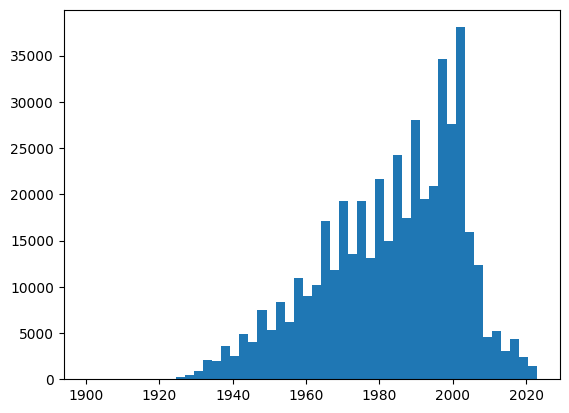

In [36]:
plt.hist(dataset[dataset['annee_naissance'] > 0.0]['annee_naissance'], bins=50)

In [37]:
#save the cleaned dataset
dataset.to_csv("dataset_clean.csv", sep=";", index=False, encoding="utf-8")